### Importando Bibliotecas

In [140]:
#Importação das Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [141]:
#from sklearn.model_selection import cross_val_score
#from sklearn.tree import DecisionTreeRegressor

## Carregando Base de Dados

In [142]:
#Importando as bases de dados
#Dataframe de treinamento
treino = pd.read_csv('train.csv')

#Dataframe de teste
teste = pd.read_csv('test.csv')

## Data Exploration

In [168]:
#Vendo as 15 primeiras linhas do Df treino
teste.tail(15)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
6478,2012-12-31 09:00:00,1,0,1,2,7.38,10.605,64,7.0015
6479,2012-12-31 10:00:00,1,0,1,2,8.20,10.605,69,8.9981
6480,2012-12-31 11:00:00,1,0,1,2,9.02,11.365,60,12.9980
6481,2012-12-31 12:00:00,1,0,1,2,9.84,11.365,56,12.9980
6482,2012-12-31 13:00:00,1,0,1,2,10.66,12.880,44,11.0014
6483,2012-12-31 14:00:00,1,0,1,2,11.48,13.635,45,15.0013
6484,2012-12-31 15:00:00,1,0,1,2,11.48,14.395,45,8.9981
6485,2012-12-31 16:00:00,1,0,1,2,10.66,12.880,48,12.9980
6486,2012-12-31 17:00:00,1,0,1,2,10.66,14.395,48,6.0032
6487,2012-12-31 18:00:00,1,0,1,2,10.66,13.635,48,8.9981


In [144]:
#Vendo se algum dado é nulo
treino.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

Weather 

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

In [145]:
#Vendo cada tipo de clima
treino.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

,count
weather,
1,205.236791
2,178.955540
3,118.846333
4,164.000000


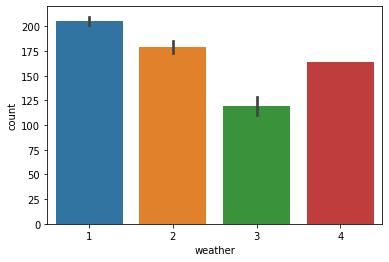

In [146]:
#Vendo a média de alugueis em cada tipo de clima
sns.barplot(x='weather', y='count', data=treino)
treino[['count', 'weather']].groupby(['weather'], as_index = True).mean()


season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 

,count
season,
1,116.343261
2,215.251372
3,234.417124
4,198.988296


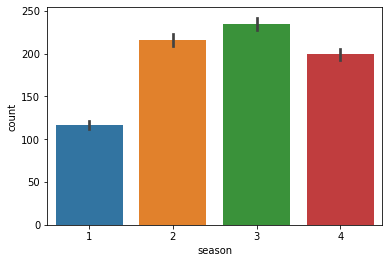

In [147]:
#Vendo a média de alugueis em cada tipo de estação
sns.barplot(x='season', y='count', data=treino)
treino[['count', 'season']].groupby(['season'], as_index = True).mean()

In [148]:
treino[['count', 'holiday']].groupby(['holiday'], as_index = True).mean()

,count
holiday,
0,191.741655
1,185.877814


<AxesSubplot:>

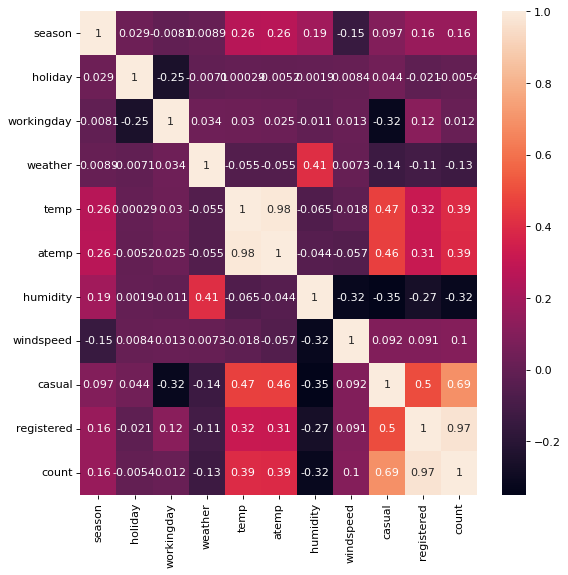

In [149]:
correlacao = treino.corr()
plt.figure(figsize=(8, 8), dpi=80)
sns.heatmap(data=correlacao, annot=True)

## Manipulação de Dados

In [150]:
treino["hora"] = [t.hour for t in pd.DatetimeIndex(treino.datetime)]
treino["dia"] = [t.dayofweek for t in pd.DatetimeIndex(treino.datetime)]
treino["mês"] = [t.month for t in pd.DatetimeIndex(treino.datetime)]
treino['ano'] = [t.year for t in pd.DatetimeIndex(treino.datetime)]
treino['ano'] = treino['ano'].map({2011:0, 2012:1})

In [151]:
treino.drop(['datetime'], axis=1,inplace=True)

In [152]:
treino.drop('holiday',axis=1,inplace=True) 


In [153]:
treino.drop('atemp',axis=1,inplace=True) 


In [154]:
#Adicionando colunas com indicadores

treino = pd.get_dummies(treino, columns = ['workingday', 'season', 'weather'], prefix = ['workingday', 'season', 'weather'])

In [155]:
treino.head()

,temp,humidity,windspeed,casual,registered,count,hora,dia,mês,ano,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,9.84,81,0.0,3,13,16,0,5,1,0,1,0,1,0,0,0,1,0,0,0
1,9.02,80,0.0,8,32,40,1,5,1,0,1,0,1,0,0,0,1,0,0,0
2,9.02,80,0.0,5,27,32,2,5,1,0,1,0,1,0,0,0,1,0,0,0
3,9.84,75,0.0,3,10,13,3,5,1,0,1,0,1,0,0,0,1,0,0,0
4,9.84,75,0.0,0,1,1,4,5,1,0,1,0,1,0,0,0,1,0,0,0


<AxesSubplot:>

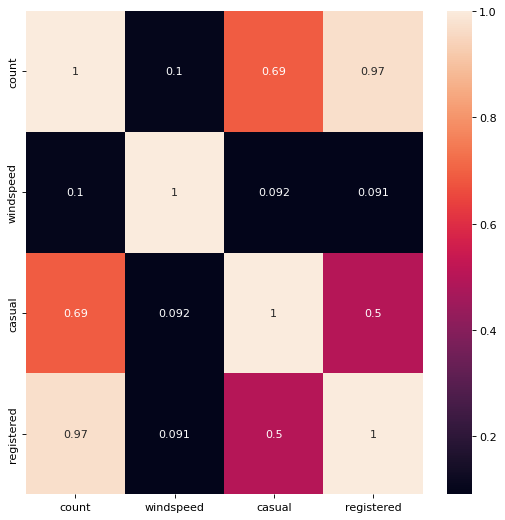

In [156]:
correlacao = treino[['count', 'windspeed', 'casual', 'registered']].corr()
plt.figure(figsize=(8, 8), dpi=80)
sns.heatmap(correlacao, annot=True)


## Modelos

In [157]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score


In [158]:
x, y = treino.iloc[:, 1:], treino['count']

In [159]:
x = treino.drop(columns = ['registered', 'casual', 'count', 'windspeed'])
x.shape

(10886, 16)

In [160]:
y = treino['count']
y.shape

(10886,)

In [161]:
from sklearn.preprocessing import StandardScaler
scl= StandardScaler()
X_treino_std = scl.fit_transform(x)

In [162]:
rf = RandomForestRegressor(n_estimators=100,criterion='mse',random_state=1, n_jobs=-1)
rf.fit(X_treino_std, y)
y_treino_pred = rf.predict(X_treino_std)
np.round(y_treino_pred)

In [163]:
y_treino_pred.shape


(10886,)

In [164]:
from sklearn.metrics import mean_squared_error, r2_score
#Root_Mean_Square_Log_Error(RMSE) is accuracy criteria for this problem
print('RMSLE treino: %.3f' % np.sqrt(mean_squared_error(np.log(y + 1), np.log(y_treino_pred + 1))))

print('R2 treino: %.3f' % r2_score(y, y_treino_pred))


RMSLE treino: 0.143
R2 treino: 0.993


In [167]:
ss = pd.read_csv('sampleSubmission.csv')
ss.tail()

,datetime,count
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0
6492,2012-12-31 23:00:00,0


In [166]:
ss['count'] = y_treino_pred
ss.head()


ValueError: Length of values (10886) does not match length of index (6493)

In [ ]:
ss.to_csv('bike_submission9.csv',index=False)
